In [1]:
# we consider stock price as running objects
# introduce a magnitude to describe the trend

In [2]:
# 1. Momentum_t=P_t-P{t-m}
import pandas as pd
import matplotlib.pyplot as plt
Vanke=pd.read_csv('Vanke.csv')
Vanke.index=Vanke.iloc[:,1]
Vanke.index=pd.to_datetime(Vanke.index, format='%Y-%m-%d')
Vanke=Vanke.iloc[:,2:]
Vanke.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,8.03,8.03,8.03,8.03,0
2014-01-02,7.99,8.07,7.92,7.99,48529900


In [3]:
Close=Vanke.Close
Close.describe()
lag5Close=Close.shift(5)
momentum5=Close-lag5Close
momentum5.tail()

Date
2015-04-22    0.98
2015-04-23    0.46
2015-04-24   -0.25
2015-04-27    0.49
2015-04-28   -0.29
Name: Close, dtype: float64

Text(0,0.5,'Momentum5')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


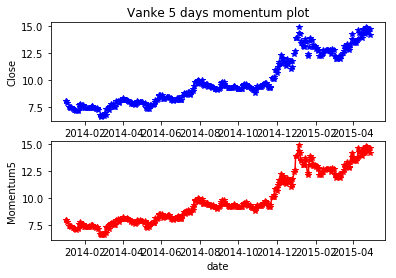

In [4]:
#plot
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.subplot(211)
plt.plot(Close,'b*')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('Vanke 5 days momentum plot')
plt.subplot(212)
plt.plot(Close,'r-*')
plt.xlabel('date')
plt.ylabel('Momentum5')

In [5]:
# 2. rate of change ROC_t=P_t-P{t-m}/P{t-m}
Momen5=Close/lag5Close-1
Momen5=Momen5.dropna();
Momen5[0:5]

Date
2014-01-08   -0.075965
2014-01-09   -0.066333
2014-01-10   -0.058673
2014-01-13   -0.032086
2014-01-14   -0.026918
Name: Close, dtype: float64

In [6]:
# we can use functions to compute momentum
def momentum(price,periond):
    lagPrice=price.shift(periond)
    momen=price-lagPrice
    momen= momen.dropna()
    return(momen)

In [7]:
momentum(Close,5).tail(n=5)

Date
2015-04-22    0.98
2015-04-23    0.46
2015-04-24   -0.25
2015-04-27    0.49
2015-04-28   -0.29
Name: Close, dtype: float64

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


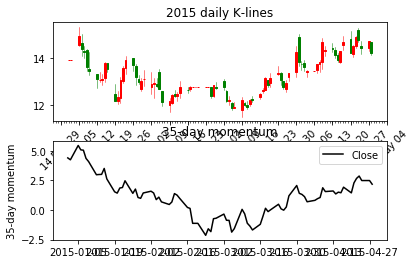

1

In [9]:
# compute 35-day momentum plot
momen35=momentum(Close,35)
# use a new function in the module 'candle'
import candle
Vanke15=Vanke['2015']
candle.candleLinePlots(Vanke['2015'],\
               candleTitle='2015 daily K-lines',\
               splitFigures=True,Data=momen35['2015'],\
               title='35-day momentum',ylabel='35-day momentum')

In [11]:
# trading based on momentum analysis
# get close prices and compute 35-day momentum
Close=Vanke.Close
momen35=momentum(Close,35)
momen35.head()

Date
2014-02-20   -0.71
2014-02-21   -0.83
2014-02-24   -1.15
2014-02-25   -0.91
2014-02-26   -0.75
Name: Close, dtype: float64

In [12]:
# signals
Close=Vanke.Close
momen35=momentum(Close,35)
momen35.head()
signal=[]
for i in momen35:
    if i>0:
        signal.append(1)
    else:
        signal.append(-1)

In [13]:
signal=pd.Series(signal,index=momen35.index)
signal.head()

Date
2014-02-20   -1
2014-02-21   -1
2014-02-24   -1
2014-02-25   -1
2014-02-26   -1
dtype: int64

In [17]:
# trade, compute returns 
tradeSig = signal.shift(1)
ret=Close/Close.shift(1)-1
# ret=ret['2014-02-20':]
# ret.head(n=3)
Mom35Ret=(ret*tradeSig).dropna()
Mom35Ret[0:5]

Date
2014-02-21    0.021858
2014-02-24    0.065642
2014-02-25    0.017937
2014-02-26   -0.016743
2014-02-27    0.013473
dtype: float64

In [18]:
# evaluate
# compare our signal with real trend
# compute winning rate
real_Mom35Ret=Mom35Ret[Mom35Ret!=0]
real_ret=ret[ret!=0]
win=Mom35Ret[Mom35Ret>0]
winrate=len(win)/len(real_Mom35Ret)
winrate

0.5211267605633803

Text(0.5,1,'Vanke return plot')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


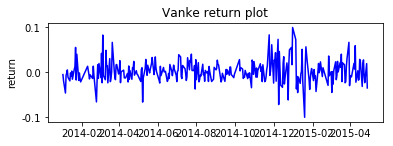

In [19]:
# plot w.r.t time change
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.subplot(2,1,1)
plt.plot(real_ret,'b')
plt.ylabel('return')
plt.title('Vanke return plot')

Text(0.5,1,'Vanke Momentum return')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


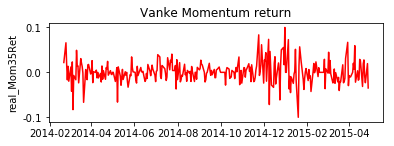

In [21]:
plt.subplot(2,1,2)
plt.plot(Mom35Ret,'r')
plt.ylabel('real_Mom35Ret')
plt.title('Vanke Momentum return')

In [23]:
# compute the returns when predicting right or wrong
loss=-Mom35Ret[Mom35Ret<0]

Text(0.5,1,'profit histgram')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


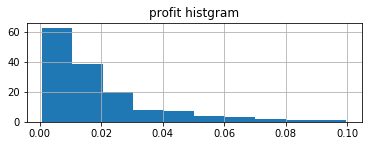

In [24]:
plt.subplot(2,1,1)
win.hist()
plt.title("profit histgram")

Text(0.5,1,'loss histgram')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


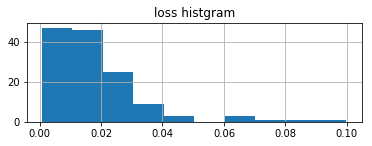

In [27]:
plt.subplot(2,1,2)
loss.hist()
plt.title("loss histgram")
# wrong loses more than predicting well a little bit

In [28]:
# compare
performance=pd.DataFrame({"win":win.describe(),"loss":loss.describe()})
performance

,win,loss
count,148.000000,136.000000
mean,0.018646,0.018514
std,0.018261,0.015860
min,0.000769,0.000805
25%,0.005472,0.008214
50%,0.013444,0.015996
75%,0.024786,0.022360
max,0.099684,0.099852
